# Self Organizing Maps

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [4]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

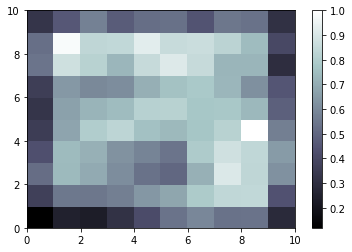

In [5]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

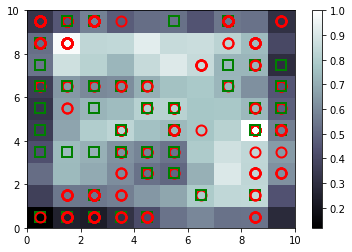

In [6]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [7]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,4)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15585855.0
15591360.0
15568819.0
15678882.0
15671769.0
15654859.0
15723827.0
15750921.0
15728010.0
15725028.0
15689268.0
15731989.0
15744423.0
15706394.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


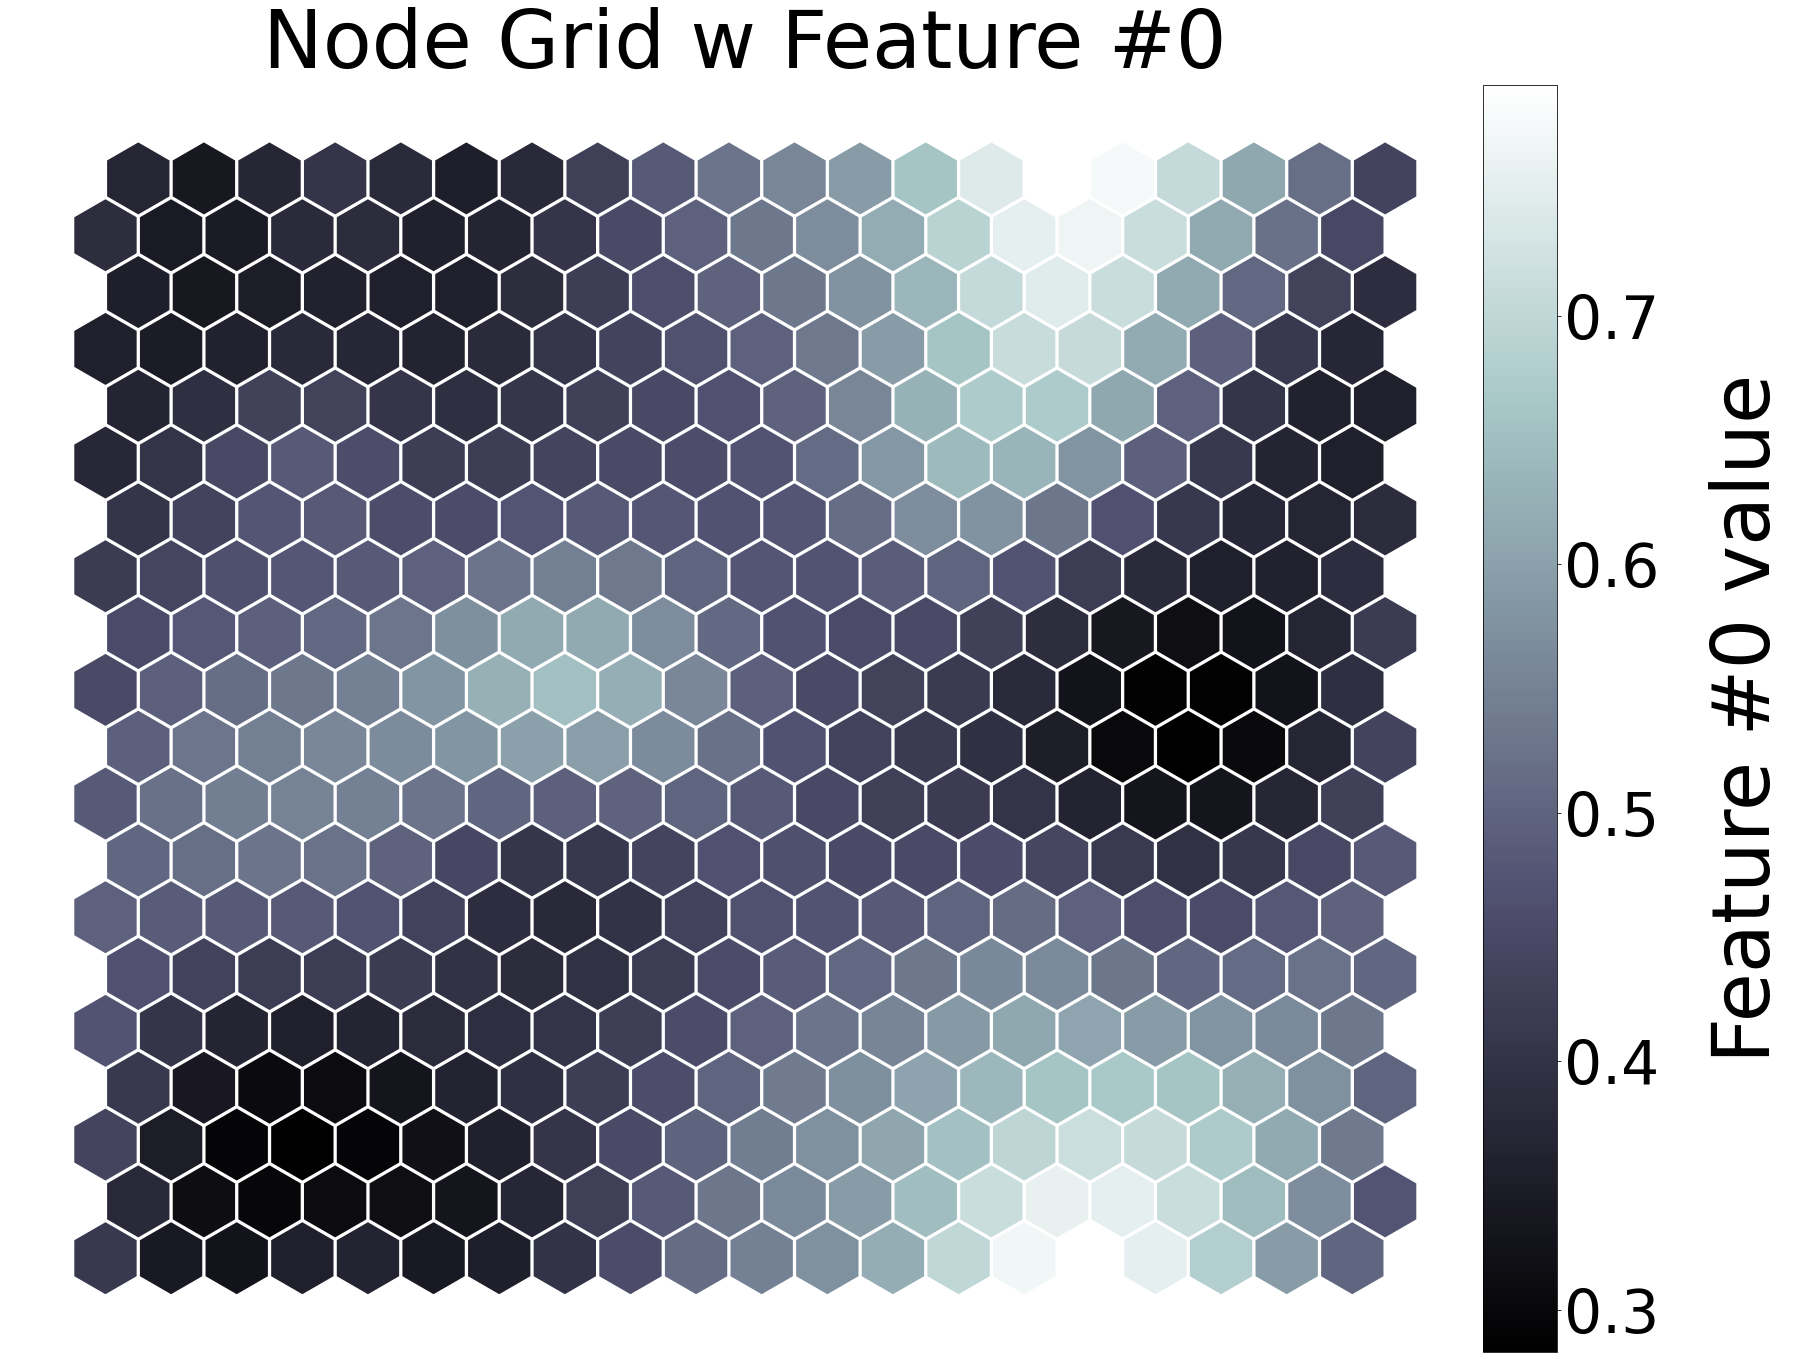

In [8]:
# ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(0.5, 100)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

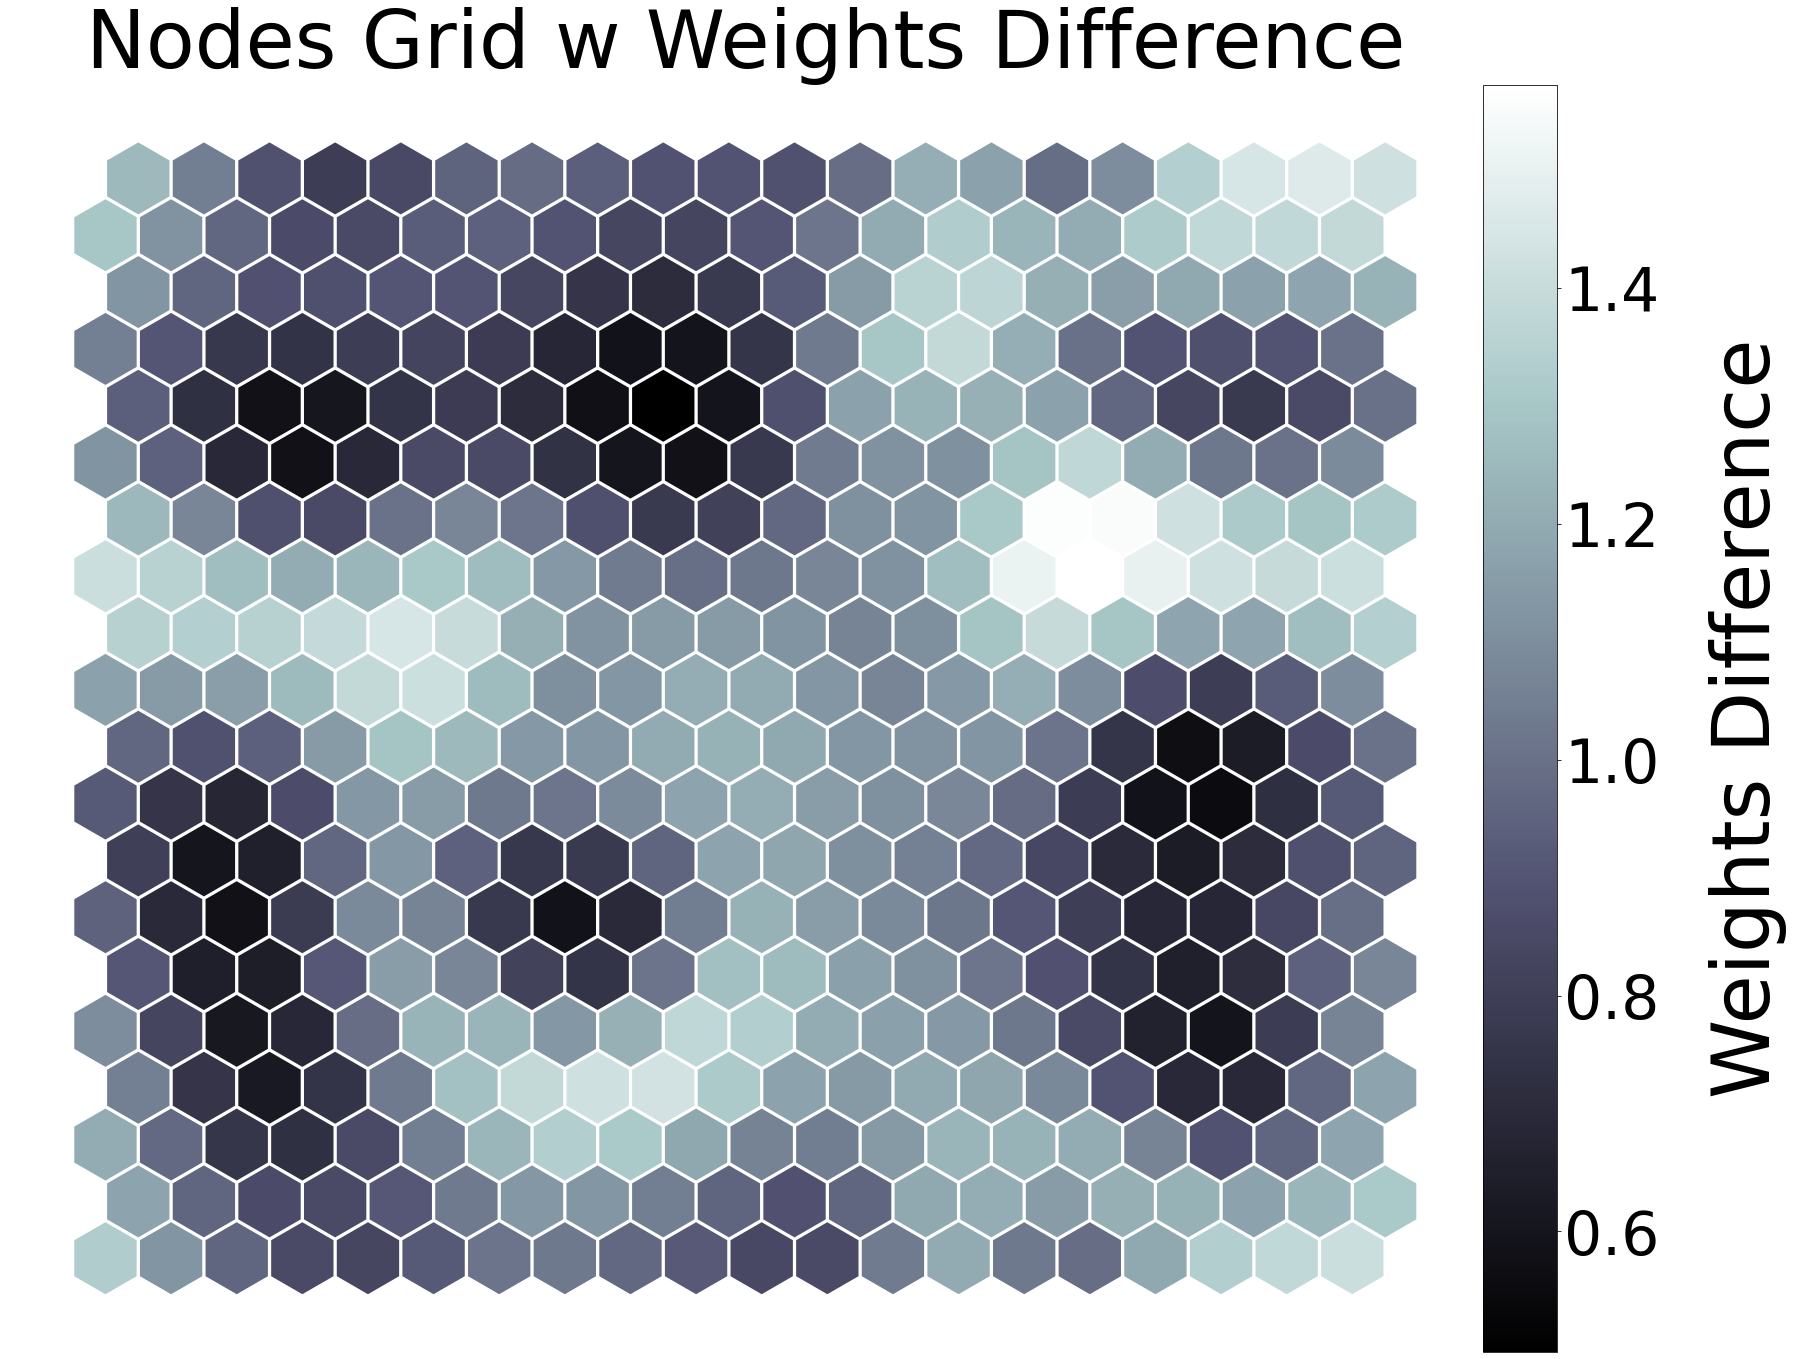

In [9]:
net.diff_graph()

In [10]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[14.5, 4.330127018922194],
 [8, 5.196152422706632],
 [13.5, 7.794228634059948],
 [13, 12.124355652982143],
 [3, 12.124355652982143],
 [8.5, 12.99038105676658],
 [2.5, 6.062177826491071],
 [8.5, 12.99038105676658],
 [1.5, 6.062177826491071],
 [13, 12.124355652982143],
 [16.5, 12.99038105676658],
 [17.5, 12.99038105676658],
 [17.5, 12.99038105676658],
 [15, 13.856406460551021],
 [16.5, 7.794228634059948],
 [2, 5.196152422706632],
 [17, 13.856406460551021],
 [8, 10.392304845413264],
 [2, 6.9282032302755105],
 [8.5, 11.258330249197702],
 [7.5, 6.062177826491071],
 [13.5, 11.258330249197702],
 [2, 5.196152422706632],
 [12, 0.0],
 [2, 3.4641016151377553],
 [16, 13.856406460551021],
 [1.5, 6.062177826491071],
 [17.5, 12.99038105676658],
 [7.5, 11.258330249197702],
 [18, 13.856406460551021],
 [17, 13.856406460551021],
 [12.5, 7.794228634059948],
 [13.5, 16.454482671904337],
 [17.5, 12.99038105676658],
 [15.5, 11.258330249197702],
 [3.5, 16.454482671904337],
 [16, 0.0],
 [16.5, 12.990381056766

<Figure size 432x288 with 0 Axes>

In [11]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh')	

[[2,
  3,
  9,
  10,
  11,
  12,
  13,
  14,
  16,
  21,
  25,
  27,
  29,
  30,
  31,
  33,
  34,
  37,
  38,
  39,
  41,
  43,
  45,
  50,
  53,
  54,
  55,
  59,
  60,
  61,
  66,
  69,
  71,
  73,
  87,
  88,
  98,
  105,
  108,
  109,
  111,
  112,
  115,
  116,
  117,
  118,
  124,
  129,
  130,
  138,
  139,
  142,
  143,
  144,
  146,
  159,
  161,
  162,
  163,
  166,
  171,
  172,
  174,
  176,
  177,
  181,
  182,
  183,
  188,
  191,
  199,
  208,
  209,
  212,
  213,
  214,
  219,
  220,
  222,
  223,
  228,
  229,
  231,
  242,
  245,
  246,
  247,
  248,
  251,
  252,
  256,
  262,
  265,
  266,
  267,
  269,
  273,
  275,
  283,
  285,
  286,
  291,
  293,
  296,
  298,
  299,
  300,
  304,
  305,
  308,
  309,
  316,
  317,
  320,
  322,
  324,
  327,
  329,
  333,
  334,
  340,
  342,
  345,
  346,
  348,
  352,
  355,
  360,
  361,
  362,
  365,
  373,
  376,
  380,
  381,
  384,
  386,
  395,
  397,
  402,
  405,
  413,
  415,
  428,
  432,
  433,
  435,
  437,
  43

<Figure size 432x288 with 0 Axes>